# Thư viện

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Đọc dữ liệu

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Khả năng trả nợ của khách hàng cá nhân bằng mô hình cây quyết định - Câu trả lời biểu mẫu 1.csv",index_col=0)

# Hàm

In [3]:
# Hàm vẽ đường ROC-AUC
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [4]:
# Hàm coding từ chữ sang số
def code_data(text):
    code_text = df[text]
    trafer_coding = []
    for i in code_text:
        if '4' in i[0]:
            i = 4
            trafer_coding.append(i)        
        elif '1' in i[0]:
            i = 1
            trafer_coding.append(i)
        elif '2' in i[0]:
            i = 2
            trafer_coding.append(i)
        elif '3' in i[0]:
            i = 3
            trafer_coding.append(i)
        elif '0' in i[0]:
            i = 0
            trafer_coding.append(i)  
    return trafer_coding


# Quá trình

In [5]:
# Thống kê mô tả
df.describe()

,Khả năng trả nợ vay khách hàng cá nhân,Thu nhập,Số tiền vay,Chi phí dự phòng*,Mục đích vay,Số năm công tác**,Số lần quan hệ tín dụng,Số nguồn thu nhập,Tài sản đảm bảo,Độ tuổi,Trình độ,Hôn nhân,Giới tính
count,434,434,434,434,434,434,434,434,434,434,434,434,434
unique,2,4,2,2,2,3,2,2,2,3,2,3,2
top,1: Trả nợ đúng hạn,2: Trung bình (39.425.000 < X ≤ 61.500.000),1: Nhỏ hơn KNTN****,1: Cao (X ≥ Chi phí dự phòng theo quy định ACB),1: Vay phục vụ nhu cầu đời sống,2: 2 < X ≤ 5 (năm),2: QHTD nhiều lần (X > 1),1: Ít nguồn thu nhập (X < 2),1: Thuộc sở hữu người vay,2: 30 < X ≤ 50,"1: Cao (Sau đại học, đại học, cao đẳng)",2: Đã kết hôn,0: Nam
freq,254,160,225,237,234,178,222,225,229,199,259,188,264


In [6]:
df.value_counts(['Trình độ','Mục đích vay'])

Trình độ                                 Mục đích vay                   
1: Cao (Sau đại học, đại học, cao đẳng)  1: Vay phục vụ nhu cầu đời sống    152
                                         2: Vay phục vụ SXKD                107
2: Thấp (Trung cấp, phổ thông, khác)     2: Vay phục vụ SXKD                 93
                                         1: Vay phục vụ nhu cầu đời sống     82
dtype: int64

In [7]:
# Áp dụng hàm coding cho các cột
for i in df.columns:
    df[i] = code_data(i)

In [8]:
# Coding cho biến phụ thuộc
y_coding = []
for i in df['Khả năng trả nợ vay khách hàng cá nhân']:
    if i == 1:
        i = 0
        y_coding.append(i)
    elif i == 2:
        i = 1
        y_coding.append(i)

df['Khả năng trả nợ vay khách hàng cá nhân'] = y_coding

In [9]:
# Thiết lập lại index
df.index = [i for i in range(1,len(df)+1)]
df.index.set_names('STT',inplace= True)

In [10]:
df

,Khả năng trả nợ vay khách hàng cá nhân,Thu nhập,Số tiền vay,Chi phí dự phòng*,Mục đích vay,Số năm công tác**,Số lần quan hệ tín dụng,Số nguồn thu nhập,Tài sản đảm bảo,Độ tuổi,Trình độ,Hôn nhân,Giới tính
STT,,,,,,,,,,,,,
1,0,4,2,1,2,2,2,2,1,2,1,3,0
2,1,2,1,2,2,3,1,1,1,2,2,3,1
3,0,1,2,1,1,1,1,1,0,1,1,1,1
4,1,4,1,1,1,2,1,2,0,2,1,2,1
5,0,1,2,1,1,1,1,2,1,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1,2,1,1,1,2,2,2,1,3,1,2,0
431,0,2,1,2,1,2,1,1,0,2,1,2,0
432,1,1,2,1,2,1,2,1,1,1,1,2,0


In [11]:
# Thiết lập thuộc tính biến độc lập
feature = df.columns[1:].to_list()

# Gán biến phụ thuộc và biến độc lập
y = df['Khả năng trả nợ vay khách hàng cá nhân']
x = df[feature]

In [12]:
# Chia tệp huấn luyện và tệp kiểm tra
n_state = 50
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.9, test_size = 0.1, random_state=n_state) 

In [13]:
# Xây dựng mô hình Decision Tree
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(x_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = DT_classifier.predict(x_test)

# In các thông số quan trọng

# Ma trận bối rối
print(f'Confustion Matrix:\n{confusion_matrix(y_test,y_pred)}\n')

# Báo cáo phân loại
print(f'Report model:\n{classification_report(y_test,y_pred)}')

# Tỉ lệ chính xác accuracy
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

Confustion Matrix:
[[13 11]
 [14  6]]

Report model:
              precision    recall  f1-score   support

           0       0.48      0.54      0.51        24
           1       0.35      0.30      0.32        20

    accuracy                           0.43        44
   macro avg       0.42      0.42      0.42        44
weighted avg       0.42      0.43      0.43        44

Decision Tree accuracy:  0.4318181818181818


In [14]:
# Các biến quan trọng
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': df.columns[1:len(df.columns)], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
0,Thu nhập,0.142638
4,Số năm công tác**,0.136090
10,Hôn nhân,0.134618
8,Độ tuổi,0.128263
7,Tài sản đảm bảo,0.084795
5,Số lần quan hệ tín dụng,0.078083
11,Giới tính,0.060315
1,Số tiền vay,0.060229
6,Số nguồn thu nhập,0.053666
3,Mục đích vay,0.043370


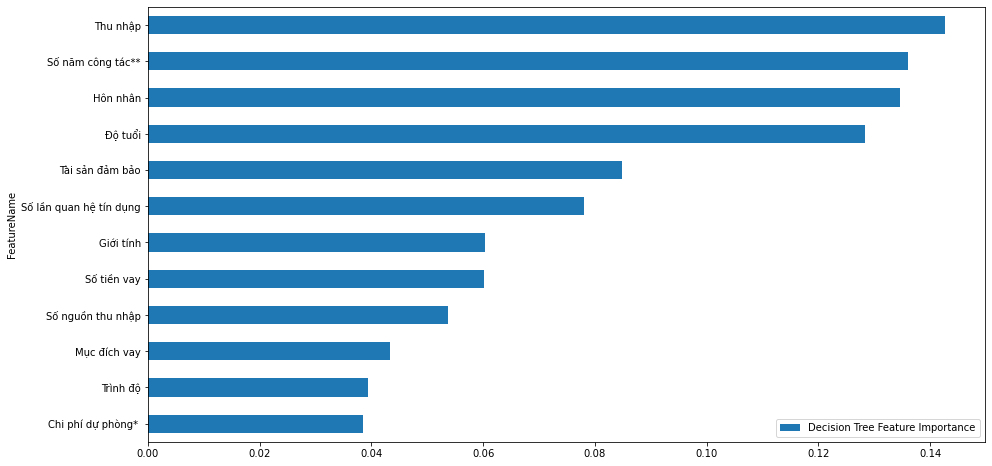

In [15]:
# Trực quan hóa các biến quan trọng
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

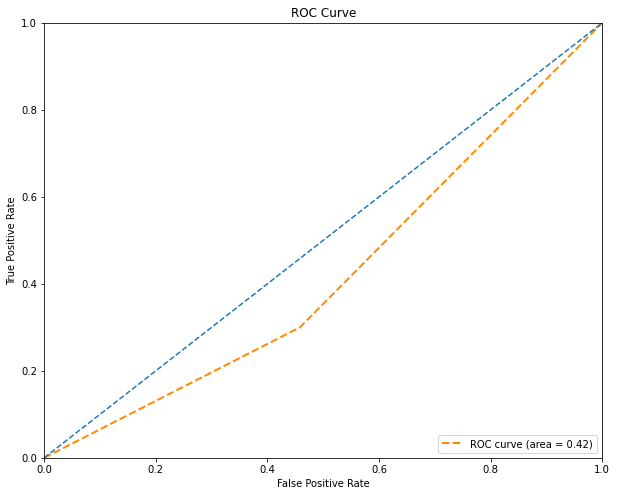

In [16]:
y_pred_prob_test = DT_classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [17]:
x_plot_tree = df[feature]

In [18]:
from sklearn import tree

KeyError: 9

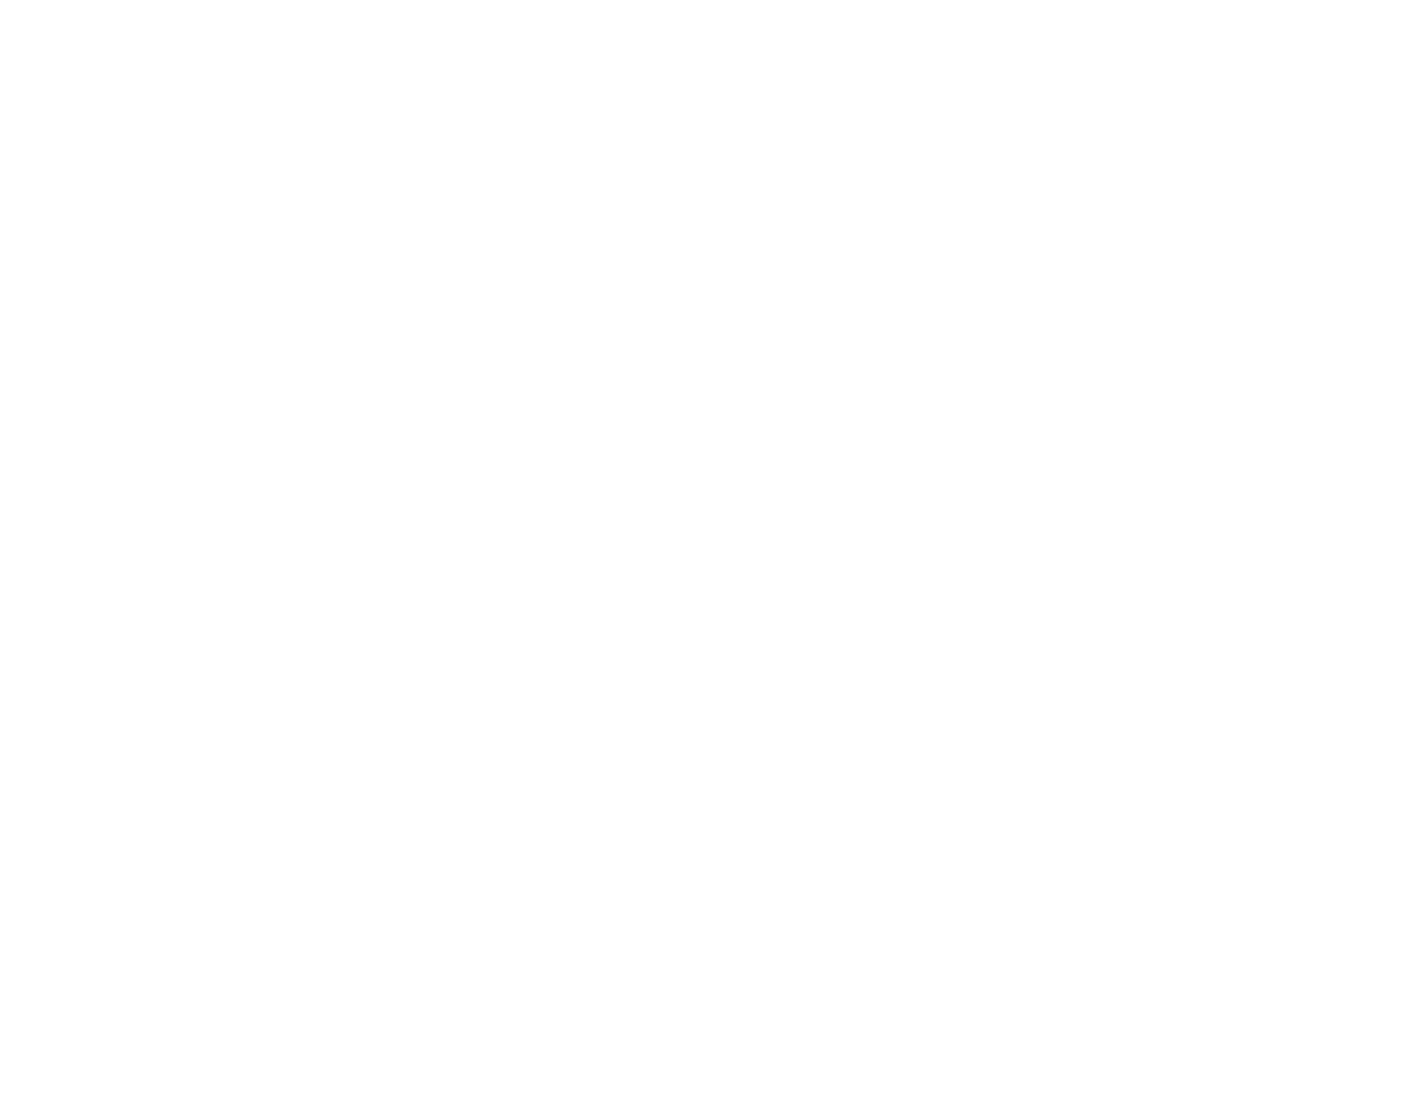

In [19]:
clf = DecisionTreeClassifier()
clf.fit(x_plot_tree.values, y.ravel())

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=x_plot_tree,  
                   class_names=y,
                   filled=True)

In [22]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

clf = DecisionTreeClassifier()
clf.fit(x_plot_tree.values, y.ravel())

export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())